<a href="https://colab.research.google.com/github/thangpro1242002/do-an-R/blob/main/d%E1%BB%AF_li%E1%BB%87u_lazada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hiển thị Trực quan hóa Dữ liệu Khách hàng của Lazada Indonesia
-Nguồn tập dữ liệu : https://www.kaggle.com/grikomsn/lazada-indonesian-reviews

##I.Khám phá dữ liệu

In [1]:
# Các thư viện thông dụng

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas  as pd 
import numpy   as np 
import seaborn as sns


In [17]:
#Tập dữ liệu
df = pd.read_csv('/content/20191002-items.csv')
df.head(15)

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02
5,100006860,beli-harddisk-eksternal,Sandisk Flashdisk Cruzer Glide CZ60 16GB + iRi...,SanDisk,https://www.lazada.co.id/products/sandisk-flas...,55800,4,2,2019-10-02
6,100007498,beli-harddisk-eksternal,Asus X407UB-BV187T Laptop Multimedia Murah I C...,Asus,https://www.lazada.co.id/products/asus-x407ub-...,8132000,5,2,2019-10-02
7,100010722,beli-harddisk-eksternal,"Philips 32PHA3052S/70 32"" Televisi LED (FREE B...",Philips,https://www.lazada.co.id/products/philips-32ph...,1990000,4,10,2019-10-02
8,100010745,beli-harddisk-eksternal,Philips 39PHA4251S/70 39' Televisi LED (FREE B...,Philips,https://www.lazada.co.id/products/philips-39ph...,3190000,4,7,2019-10-02
9,100015720,beli-harddisk-eksternal,Acer E5 575G-74E2 - Core i7-6500U - RAM 8GB DD...,Acer,https://www.lazada.co.id/products/acer-e5-575g...,8000000,3,8,2019-10-02


In [3]:
# Kiểm tra dữ liệu mỗi cột
df.info()
print('-'*40,'\n','Shape :',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10942 non-null  int64 
 1   category       10942 non-null  object
 2   name           10942 non-null  object
 3   brandName      10940 non-null  object
 4   url            10942 non-null  object
 5   price          10942 non-null  int64 
 6   averageRating  10942 non-null  int64 
 7   totalReviews   10942 non-null  int64 
 8   retrievedDate  10942 non-null  object
dtypes: int64(4), object(5)
memory usage: 769.5+ KB
---------------------------------------- 
 Shape : (10942, 9)


In [5]:
# Mô tả dữ liệu
df.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


In [6]:
# Số lượng của từng dữ liệu trong cột category
df.category.value_counts()

beli-harddisk-eksternal    4422
jual-flash-drives          3318
beli-smart-tv              1290
shop-televisi-digital      1211
beli-laptop                 701
Name: category, dtype: int64

In [7]:
# Hiễn thị dữ liệu trong cột brandName
df['brandName'].unique()

array(['Toshiba', 'LG', 'Sharp', 'Lenovo', 'SanDisk', 'Asus', 'Philips',
       'Acer', 'Maxtor', 'Orico', 'HP', 'Transformers', 'WD', 'Panasonic',
       'Hitachi', 'Sony', 'Ikedo', 'Seagate', 'Sanyo', 'Ichiko',
       'Polytron', 'Kevindo', 'Xiaomi', 'VANDISK', 'VAKIND', 'Advance',
       'USB', 'Samsung', 'China OEM', 'thinch', 'Kingston', 'Adata',
       'TCL', 'Billionton', 'V-Gen', 'Dell', 'No Brand', 'JUC',
       'Microsoft', 'Coocaa', 'DBest', 'Transcend', 'Hardcase', 'Aqua',
       'SSK', 'Flashdisk', 'Unitek', 'Toserba', 'Trans', 'Otoshop',
       'Konka', nan, "Trend's", 'Multi', 'M-Tech', 'OneGood',
       'OTG USB Adapter', 'Import', 'O', 'Pqi', 'Universal', 'EsoGoal',
       'AoTu', 'SATA', 'Polysonic', 'Uactor', 'Razer', 'UGREEN', 'MSI',
       'Vitron', 'Beauties', '4Connect', 'Apple', 'EELIC', 'SUNSKY',
       'SiliconPower', 'Case', 'Canon', 'Apexel', 'Hisense', 'EAGET',
       'PhotoFast', 'Moonar', 'Seasonic', 'Notebook', 'Disney', 'Akari',
       'OTG', 'JvGood', 

In [8]:
# Hiển thị dữ liệu trong cột totalReviews
df['totalReviews'].unique()

array([   8,    3,    2,   11,    1,   10,    7,    4,    6,   91,   54,
         13,   17,   29,   40,   22,    5,   23,   26,   28,   20,   49,
         15,    9,   19,   14,   56,   12,   30,   70,   16,  166,   27,
         86,   21,   25,  505,   45,   71,   51,  128,  104,   36,   37,
         18,   67,   35,   77,  362,  102,   69,   34,   63,   73,  263,
         42,   39,  188,   48,  220,   46,   43,   85,   24,  262,  149,
         90,   74,   65,   52,   32,  593,   55,   59,   33,  696,  169,
         82,   31,  136,   50,   57,   44,  115,  203,  132,  110,   38,
        113,   61,   47,  297,  135, 1022, 3751, 1577,   81,   75,  198,
         53,  229,  176, 5013,   78, 1232,  322,  287,  125, 1405, 3039,
       1533,  222,  153,  232,   62,  374, 2744,  180,  117,   72,   80,
         96,  266,  134,  112,  146,  137,  124,   93,  440,  272,  199,
        206,  129,  154,  109,  138,  264,   79,  140,  218, 1155,   83,
        249,   41,   58,  145,  111,  142,  451,  2

## II. Phân tích

**Sử dụng trực quan hóa dữ liệu** 

1. Phân tích tên hãng của sản phẩm

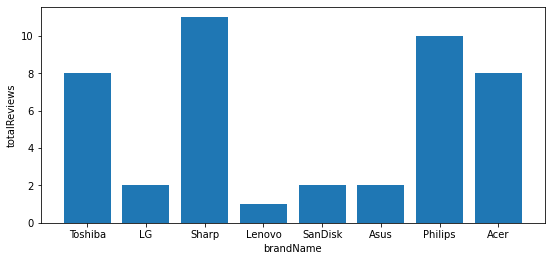

In [10]:
df = df.head(10)

fig = plt.figure(figsize=(7,3))
ax  = fig.add_axes([0,0,1,1])
ax.set_xlabel('brandName')
ax.set_ylabel('totalReviews')

ax.bar(df['brandName'],df['totalReviews'])
plt.show()

**Nhận xét:**

Sharp có tổng số đánh giá cao nhất 

Lenovo có tổng số đánh giá thấp nhất


2.Tỉ lệ phần trăm xếp hạng trung bình của mỗi hãng





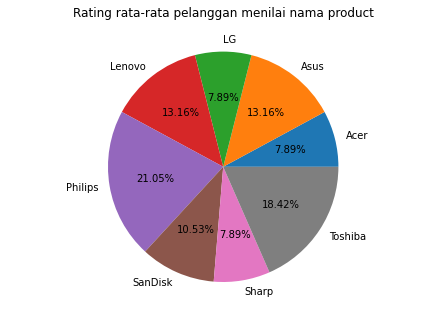

In [11]:
#piechart df_items
df = df.groupby('brandName').sum()['averageRating'].reset_index()
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.set_title(label= 'Rating rata-rata pelanggan menilai nama product')
ax.pie(df['averageRating'],labels = df['brandName'],autopct='%1.2f%%')
plt.show()

**Nhận xét:**

Philips có xếp hạng trung bình cao nhất(21.05%)

LG,Sharp và Acer có xếp hạng trung bình thấp và ngang nhau(7.89%)